Nombre: Hilda Beltrán

Matrícula: A01251916

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carga las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
# Carga el archivo presion.csv
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving presion.csv to presion.csv
User uploaded file "presion.csv" with length 772 bytes


In [ ]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('presion.csv')
df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


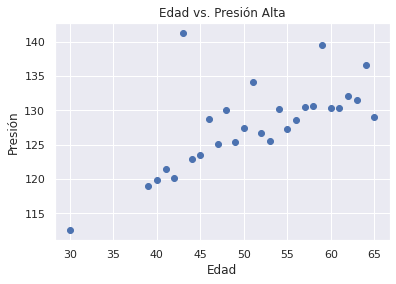

In [ ]:
# Grafica la información de la edad y presión alta
age = df['Age']
high = df['Average of ap_hi']
plt.scatter(age, high);
plt.title("Edad vs. Presión Alta")
plt.xlabel("Edad")
plt.ylabel("Presión")
plt.show()

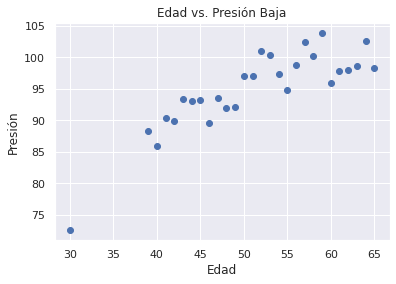

In [ ]:
# Grafica la información de la edad y presión baja
low = df['Average of ap_lo']
plt.scatter(age, low);
plt.title("Edad vs. Presión Baja")
plt.xlabel("Edad")
plt.ylabel("Presión")
plt.show()

In [53]:
# Genera una regresión líneal para obtener una aproximación de la ecuación (alta)
model = LinearRegression(fit_intercept=True)

model.fit(age[:, np.newaxis], high)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


LinearRegression()

In [ ]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
a = model.coef_[0]
b = model.intercept_

print('a = {} b = {}'.format(a, b))

a = 0.47769702977669154 b = 103.3969740964366


In [43]:
# Genera una regresión líneal para obtener una aproximación de la ecuación (baja)
model1 = LinearRegression(fit_intercept=True)

model1.fit(age[:, np.newaxis], low)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


LinearRegression()

In [ ]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
a1 = model1.coef_[0]
b1 = model1.intercept_

print('a = {} b = {}'.format(a1, b1))

a = 0.6089810580238237 b = 63.726200409422745


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


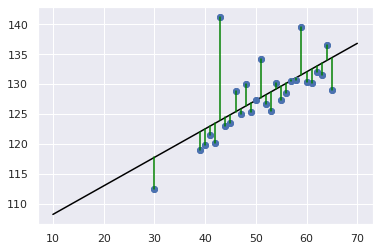

In [55]:
# Gráfica los datos reales contra los obtenidos con el modelo. Se debe 
# visualizar los datos reales (azúl), recta del modelo (negro)y distancias 
# entre ambos. (verde)

# ALTO
xfit = np.linspace(70, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(age, high)
plt.plot(xfit, yfit, color="black");
plt.plot(age, high, 'o')
plt.plot(np.vstack([age,age]), np.vstack([high, model.predict(age[:, np.newaxis])]), color="green");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


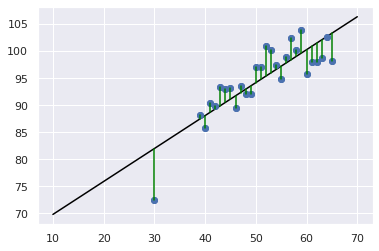

In [49]:
# Gráfica los datos reales contra los obtenidos con el modelo. Se debe 
# visualizar los datos reales (azúl), recta del modelo (negro)y distancias 
# entre ambos. (verde)

# BAJO
xfit1 = np.linspace(70, 10, 1000)
yfit1 = model1.predict(xfit1[:, np.newaxis])

plt.scatter(age, low)
plt.plot(xfit1, yfit1, color="black");
plt.plot(age, low, 'o')
plt.plot(np.vstack([age,age]), np.vstack([low, model1.predict(age[:, np.newaxis])]), color="green");

In [42]:
# ¿Cual es la presión arterial alta para una persona de cierta edad?
def pressure_high(age):
  return (a*age + b)

age_high = 76
pressure_high(age_high)

139.70194835946515

In [39]:
# ¿Cual es la presión arterial baja para una persona de cierta edad?
def pressure_low(age):
  return (a1*age + b1)

age_low = 76
print(pressure_low(age_low))

110.00876081923334
